# Pandas, Matplotlib and Seaborn

In [5]:
import pandas as pd

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

In [9]:
df = pd.read_csv("GDP (nominal) per Capita.csv", index_col=0)

EDA (Exploratory Data Analysis)

In [10]:
df.head()
#head shows the first 5 rows

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [11]:
df.describe()
#statistical value of your dataset shows mean average and std.

,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
count,223.000,223.000,223.000,223.000,223.000
mean,15351.632,1787.099,18927.417,1957.278,17767.305
std,22550.899,650.696,29103.565,353.146,28698.104
min,0.000,0.000,0.000,0.000,0.000
25%,1406.500,2023.000,2273.500,2021.000,2039.000
50%,5421.000,2023.000,6805.000,2021.000,6396.000
75%,19697.000,2023.000,23715.000,2021.000,20740.000
max,132372.000,2023.000,234316.000,2021.000,234317.000


In [12]:
df["WorldBank_Year"].max()
#maximum worldbank year

2021

In [13]:
df["WorldBank_Year"].min()
#lowest worldbank year

0

In [14]:
df.groupby(["WorldBank_Year"])["UN_Estimate"].mean()
#calculates mean for the chosen "WorldBank_Year" "UN_Estimate"

WorldBank_Year
0      15141.143
2007       0.000
2011     623.000
2014    1982.500
2015     400.000
2018   13250.500
2019    2836.000
2020   46028.571
2021   17557.407
Name: UN_Estimate, dtype: float64

In [78]:
df.groupby(["Country/Territory"])["UN_Estimate"].sum().sort_values(ascending=False).head(10)
#Lists the top 5 countries with the highest UnEstimate 

Country/Territory
Monaco            234317
Liechtenstein     169260
Luxembourg        133745
Bermuda           112653
Ireland           101109
Switzerland        93525
Norway             89242
Cayman Islands     85250
United States      69185
Iceland            69133
Name: UN_Estimate, dtype: int64

In [46]:
df["IMF_Estimate"].sort_values(ascending=False).head(10)
#top 10 values of IMF estimates top to bottom 

3     132372
4     114581
6     101103
7      98767
8      91100
11     83891
12     80034
13     75180
16     68827
17     64964
Name: IMF_Estimate, dtype: int64

In [52]:
df[("WorldBank_Estimate")].sort_values(ascending=False).head(10)
# values of world bank highest to lowest top 10

1     234316
2     157755
3     133590
5     114090
4     100172
7      91992
6      89154
9      87158
10     86569
14     75153
Name: WorldBank_Estimate, dtype: int64

In [81]:
df.UN_Region.value_counts()
#counts how many times a un region value comes up

Africa      55
Asia        51
Europe      48
Americas    48
Oceania     20
World        1
Name: UN_Region, dtype: int64

In [82]:
df[df.UN_Region=="World"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
93,World,World,13440,2023,12235,2021,12230,2021


Which countries below average by IMF world estimate?

In [90]:
df[df["IMF_Estimate"]<13440]
#below world IMF estimate which is 13440

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496,2023,635,2021,613,2021
220,South Sudan,Africa,467,2023,1072,2015,400,2021
221,Sierra Leone,Africa,415,2023,480,2021,505,2021
222,Afghanistan,Asia,611,2020,369,2021,373,2021


In [91]:
df[(df["IMF_Estimate"]>39940) & (df["UN_Region"]=="Europe")]
#below the Europian Union estimate 39940

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
16,Denmark,Europe,68827,2023,68008,2021,68037,2021
18,Netherlands,Europe,61098,2023,57768,2021,57871,2021
20,Austria,Europe,56802,2023,53638,2021,53840,2021
22,Sweden,Europe,55395,2023,61029,2021,60730,2021
23,Finland,Europe,54351,2023,53655,2021,53703,2021


In [1]:
lower_fence = lower_q - (1.5*iqr)

NameError: name 'lower_q' is not defined

In [85]:
df[df["IMF_Estimate"]==0]
# imf estimate that is ==0

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
10,Cayman Islands,Americas,0,0,86569,2021,85250,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
19,Greenland,Americas,0,0,54571,2020,58185,2021
31,British Virgin Islands,Americas,0,0,0,0,49444,2021
37,US Virgin Islands,Americas,0,0,39552,2020,0,0


In [88]:
df[df["UN_Region"]=="Europe"]
#shows data frame for Europe 

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
13,Iceland,Europe,75180,2023,68728,2021,69133,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0


In [11]:
df.shape
# shows the rows and the columns there are 223 rows and 8 columns

(223, 8)

In [19]:
df.info
# shows detailed name of rows and columns

<bound method DataFrame.info of     Country/Territory UN_Region  IMF_Estimate  IMF_Year  WorldBank_Estimate  \
1              Monaco    Europe             0         0              234316   
2       Liechtenstein    Europe             0         0              157755   
3          Luxembourg    Europe        132372      2023              133590   
4             Ireland    Europe        114581      2023              100172   
5             Bermuda  Americas             0         0              114090   
..                ...       ...           ...       ...                 ...   
219            Malawi    Africa           496      2023                 635   
220       South Sudan    Africa           467      2023                1072   
221      Sierra Leone    Africa           415      2023                 480   
222       Afghanistan      Asia           611      2020                 369   
223           Burundi    Africa           249      2023                 222   

     WorldBank_Year

In [14]:
df.columns.values
#arrays of the colum values

array(['Country/Territory', 'UN_Region', 'IMF_Estimate', 'IMF_Year',
       'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year'],
      dtype=object)

In [15]:
df.tail(10)
#last 10 results

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
214,Mozambique,Africa,587,2023,492,2021,492,2021
215,Yemen,Asia,573,2023,702,2018,302,2021
216,Somalia,Africa,544,2023,447,2021,447,2021
217,Madagascar,Africa,536,2023,501,2021,500,2021
218,Central African Republic,Africa,534,2023,461,2021,461,2021
219,Malawi,Africa,496,2023,635,2021,613,2021
220,South Sudan,Africa,467,2023,1072,2015,400,2021
221,Sierra Leone,Africa,415,2023,480,2021,505,2021
222,Afghanistan,Asia,611,2020,369,2021,373,2021
223,Burundi,Africa,249,2023,222,2021,311,2021


In [20]:
df.iloc[220]
#shows the data frame of row 221

Country/Territory     Sierra Leone
UN_Region                   Africa
IMF_Estimate                   415
IMF_Year                      2023
WorldBank_Estimate             480
WorldBank_Year                2021
UN_Estimate                    505
UN_Year                       2021
Name: 221, dtype: object

In [22]:
df.iloc[:,[1,2,3]]

,UN_Region,IMF_Estimate,IMF_Year
1,Europe,0,0
2,Europe,0,0
3,Europe,132372,2023
4,Europe,114581,2023
5,Americas,0,0
...,...,...,...
219,Africa,496,2023
220,Africa,467,2023
221,Africa,415,2023
222,Asia,611,2020


In [29]:
df[df["UN_Region"]=="Africa"].count()
# Counts the string "Africa" how many times it comes up in the colums.

Country/Territory     55
UN_Region             55
IMF_Estimate          55
IMF_Year              55
WorldBank_Estimate    55
WorldBank_Year        55
UN_Estimate           55
UN_Year               55
dtype: int64

In [59]:
df[df["Country/Territory"]=="Algeria"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
144,Algeria,Africa,4481,2023,3691,2021,3700,2021


In [61]:
df[df["UN_Region"]=="Africa"].head(55)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
74,Seychelles,Africa,19536,2023,14653,2021,12085,2021
101,Mauritius,Africa,11548,2023,9106,2021,8873,2021
107,Equatorial Guinea,Africa,9777,2023,7507,2021,7605,2021
110,Gabon,Africa,9294,2023,8635,2021,7911,2021
119,Botswana,Africa,7270,2023,6805,2021,6805,2021
122,Libya,Africa,6763,2023,6357,2021,5791,2021
125,South Africa,Africa,6485,2023,7055,2021,7055,2021
139,Namibia,Africa,5100,2023,4866,2021,4836,2021
144,Algeria,Africa,4481,2023,3691,2021,3700,2021
148,Cape Verde,Africa,4278,2023,3293,2021,3293,2021


In [69]:
df[df["UN_Region"]=="Africa"]["Country/Territory"].sort_values(ascending=True)
#Arranges in Alphabetical order

144                     Algeria
164                      Angola
191                       Benin
119                    Botswana
205                Burkina Faso
223                     Burundi
185                    Cameroon
148                  Cape Verde
218    Central African Republic
211                        Chad
193                     Comoros
170                       Congo
210                    DR Congo
154                    Djibouti
157                       Egypt
107           Equatorial Guinea
209                     Eritrea
150                    Eswatini
188                    Ethiopia
110                       Gabon
207                      Gambia
178                       Ghana
187                      Guinea
202               Guinea-Bissau
167                 Ivory Coast
176                       Kenya
197                     Lesotho
208                     Liberia
122                       Libya
217                  Madagascar
219                      Malawi
206     

In [32]:
df["UN_Region"].value_counts()
#counts how many times "UN_Region" occurs

Africa      55
Asia        51
Europe      48
Americas    48
Oceania     20
World        1
Name: UN_Region, dtype: int64

In [74]:
df.loc[0:10,["UN_Region","IMF_Year","Country/Territory"]]
#shows a data frame for rows from 0:10 of the strings "UN_Region","IMF_Year","Country/Territory".

,UN_Region,IMF_Year,Country/Territory
1,Europe,0,Monaco
2,Europe,0,Liechtenstein
3,Europe,2023,Luxembourg
4,Europe,2023,Ireland
5,Americas,0,Bermuda
6,Europe,2023,Norway
7,Europe,2023,Switzerland
8,Asia,2023,Singapore
9,Europe,0,Isle of Man
10,Americas,0,Cayman Islands


In [38]:
df[df["Country/Territory"]=="Algeria"].sum()
# sum of Algeria 

Country/Territory     Algeria
UN_Region              Africa
IMF_Estimate             4481
IMF_Year                 2023
WorldBank_Estimate       3691
WorldBank_Year           2021
UN_Estimate              3700
UN_Year                  2021
dtype: object

Which country has the highest UN estimate?

In [92]:
df[["Country/Territory", "WorldBank_Estimate"]].nlargest(1, 'WorldBank_Estimate')

,Country/Territory,WorldBank_Estimate
1,Monaco,234316


Which country has top 5 highest worldbank estimate?

In [101]:
df[["Country/Territory", "WorldBank_Estimate"]].nlargest(5, 'WorldBank_Estimate')

,Country/Territory,WorldBank_Estimate
1,Monaco,234316
2,Liechtenstein,157755
3,Luxembourg,133590
5,Bermuda,114090
4,Ireland,100172


In [102]:
df[df["Country/Territory"]=="United States"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
12,United States,Americas,80034,2023,70249,2021,69185,2021


In [103]:
df[df["Country/Territory"].str.contains("United")]
#contains united in the country/territory

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
12,United States,Americas,80034,2023,70249,2021,69185,2021
30,United Arab Emirates,Asia,49451,2023,44316,2021,43295,2021
33,United Kingdom,Europe,46371,2023,46510,2021,46542,2021


In [106]:
df[df["Country/Territory"].str.contains("M")]
#contains m in the country/territory

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0
25,San Marino,Europe,52949,2023,45320,2020,50425,2021
29,Macau,Asia,50571,2023,43874,2021,43555,2021
40,Malta,Europe,36989,2023,33487,2021,33642,2021
58,Sint Maarten (Dutch part),Americas,0,0,28988,2018,26199,2021
61,Northern Mariana Islands,Oceania,0,0,23707,2019,0,0
65,Saint Martin (French part),Americas,0,0,21921,2014,0,0
83,Maldives,Asia,17626,2023,10366,2021,10366,2021
85,Montserrat,Americas,0,0,0,0,16199,2021


In [115]:
df[df["Country/Territory"].str.startswith("M")].head(10)
#Starts with the letter "M" string in countries

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
29,Macau,Asia,50571,2023,43874,2021,43555,2021
40,Malta,Europe,36989,2023,33487,2021,33642,2021
83,Maldives,Asia,17626,2023,10366,2021,10366,2021
85,Montserrat,Americas,0,0,0,0,16199,2021
94,Malaysia,Asia,13382,2023,11109,2021,11101,2021
96,Mexico,Americas,12673,2023,10046,2021,10046,2021
101,Mauritius,Africa,11548,2023,9106,2021,8873,2021
103,Montenegro,Europe,11289,2023,9466,2021,9252,2021
127,Moldova,Europe,6342,2023,5231,2021,4468,2021


In [154]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [152]:
df.shape

(223, 8)

In [155]:
data=df[-(df["UN_Estimate"]>100000)]

In [156]:
data.shape

(218, 8)

## Checking Missing Values

In [21]:
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

## Visualization

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

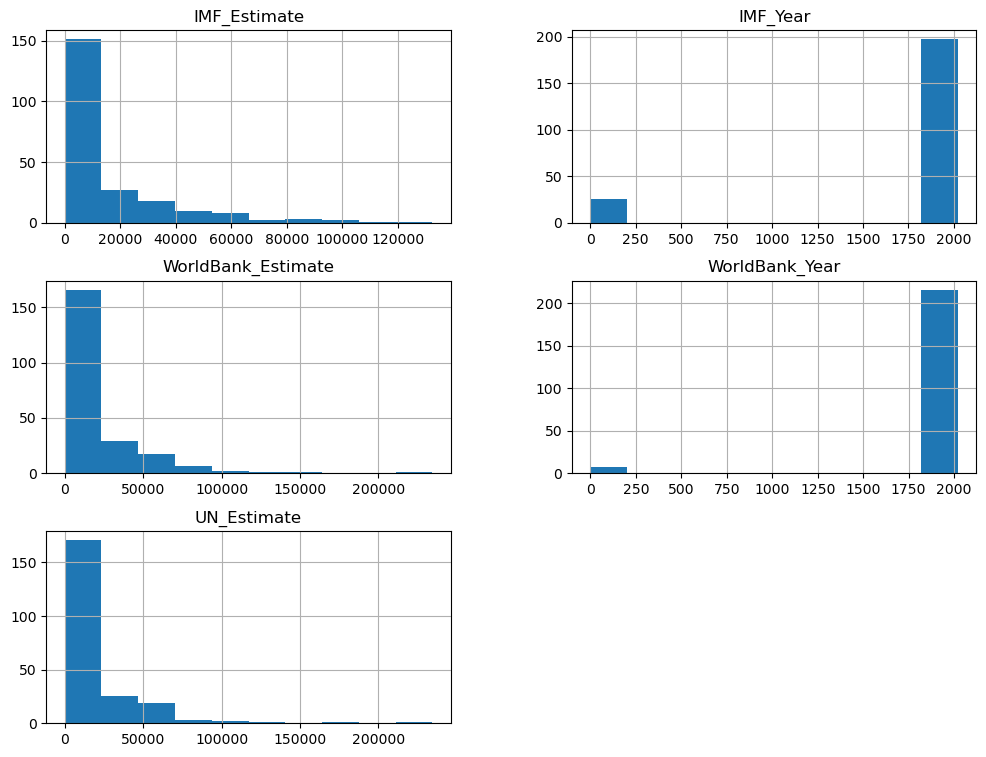

In [119]:
df.hist(figsize=(12,9))
plt.show()
#The output of the image size is the figure size (12,9)

array([[<Axes: title={'center': 'IMF_Estimate'}>,
        <Axes: title={'center': 'IMF_Year'}>],
       [<Axes: title={'center': 'WorldBank_Estimate'}>,
        <Axes: title={'center': 'WorldBank_Year'}>],
       [<Axes: title={'center': 'UN_Estimate'}>, <Axes: >]], dtype=object)

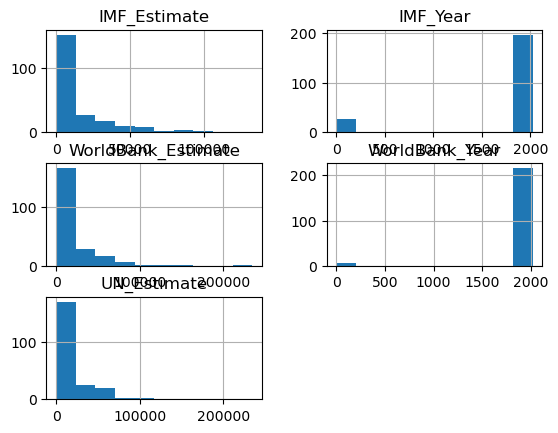

In [122]:
df.hist()
#presents histogram of statiscal data

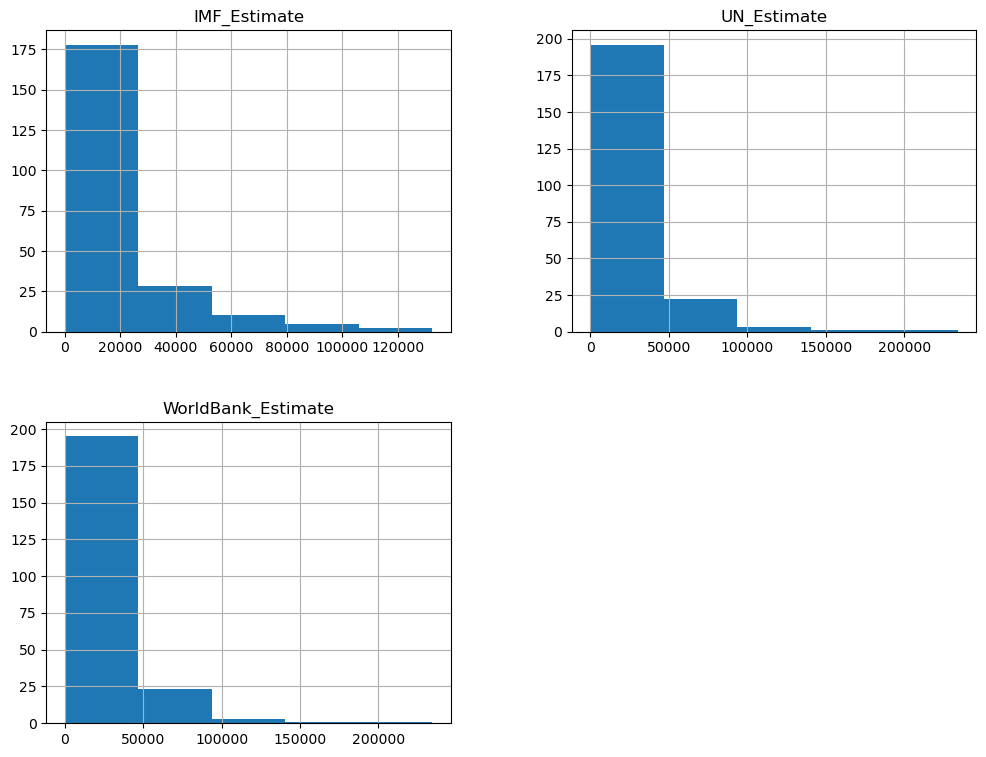

In [123]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9)) 
plt.show()
#bin size 5 those strings are put into equal parts of 5 

### Correlation Heatmap

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\808326180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


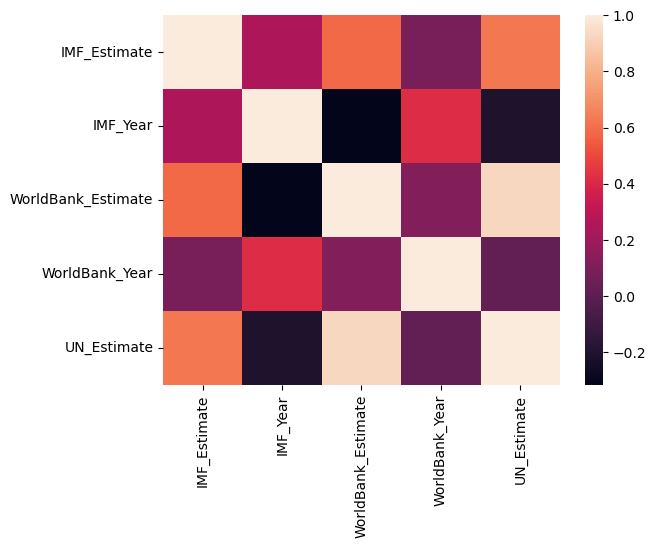

In [128]:
corr = df.corr()

sns.heatmap(corr)

plt.show()
#shows the relations , presents findings in heatwave

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\3966119382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


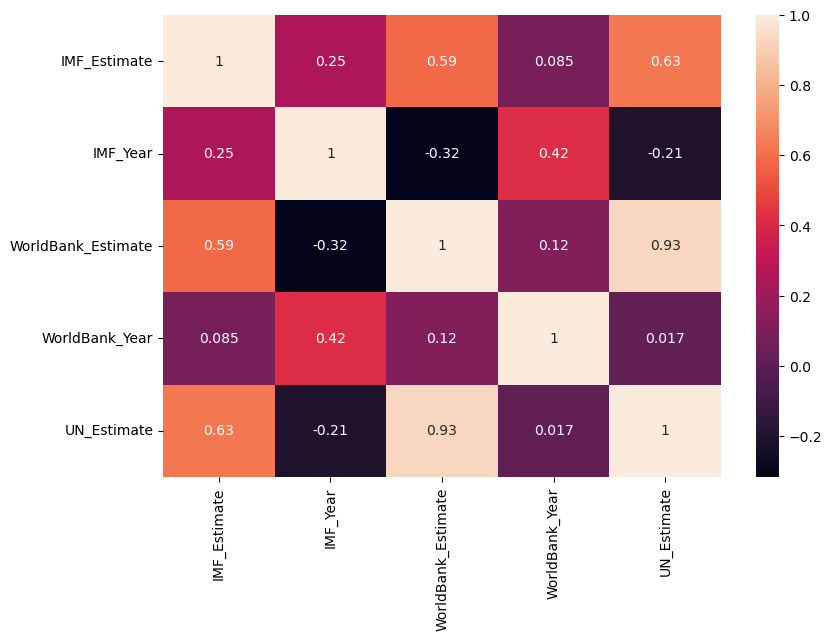

In [129]:
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True)
plt.show()
# annot=True puts text on the sections

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\53752565.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


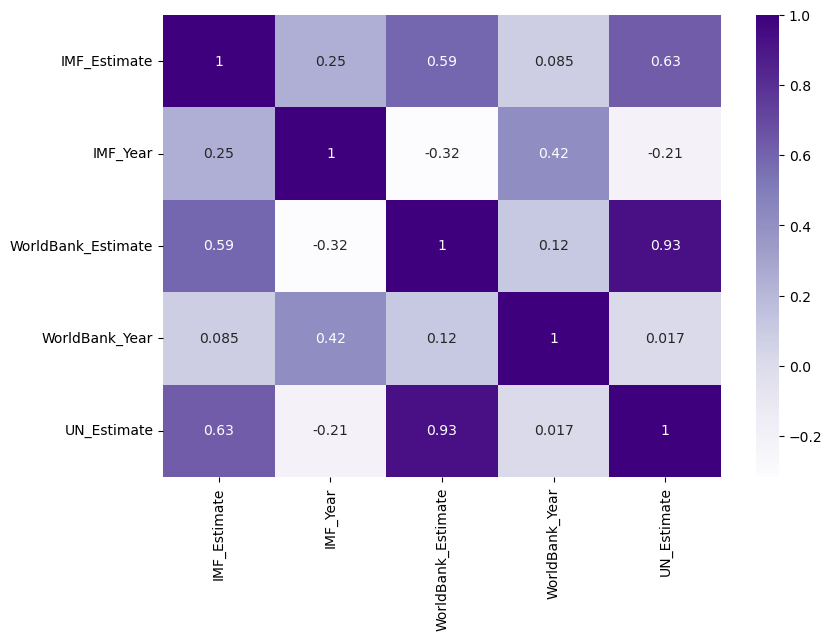

In [144]:
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap = 'Purples')
plt.show()
plt.title=("Correlation Chart")
#cmap= this is the colour code for the map follwed by the "Purples" which could be multiple colours 

### Bar plot

In [133]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


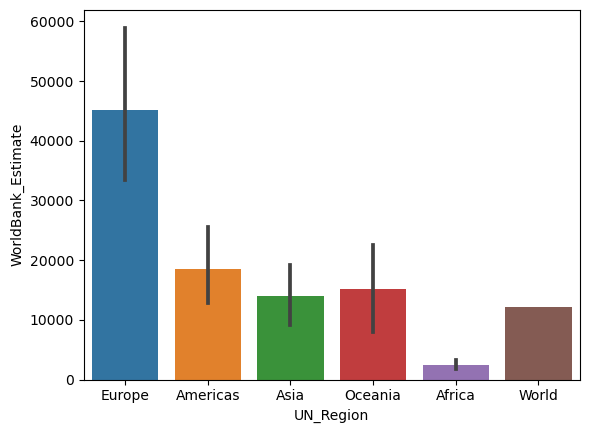

In [134]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df)
plt.show()
#total estimate for the unregion worldbank estimate

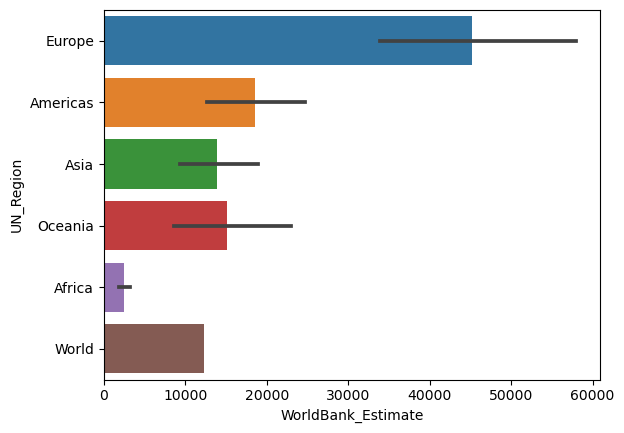

In [135]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df)
plt.show()
#presents findings with y axis unregion and x worldbank 

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\1853526924.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, ci=None)


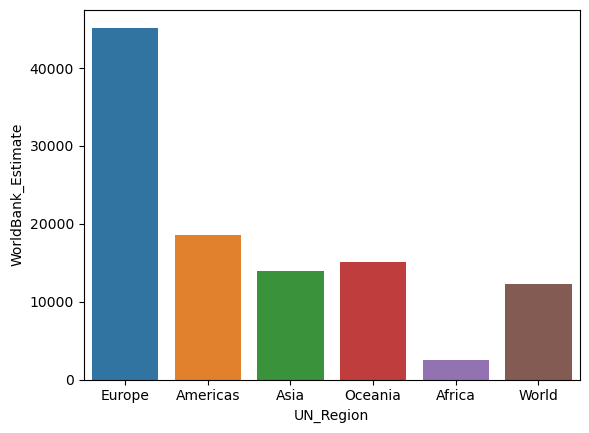

In [136]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, ci=None) 
plt.show()
#confidence interval ci=None gets rid of the lines through the bar plot 

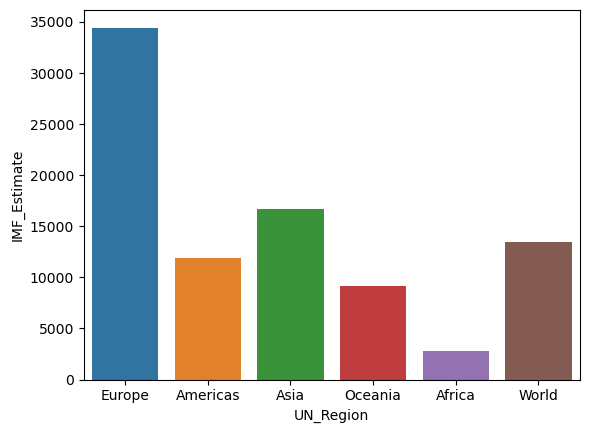

In [137]:
sns.barplot(x="UN_Region", y="IMF_Estimate", data=df, errorbar=None)
plt.show()
# barplot with errorbar=None displays no confidence intervals

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\2943738072.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",


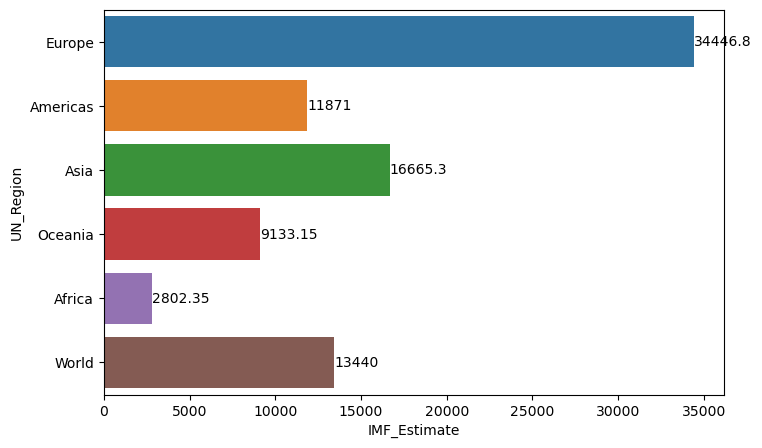

In [138]:
fig = plt.figure(figsize = (8,5))
ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, ci = None)
ax.bar_label(ax.containers[0])
plt.show()

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\372106802.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate",


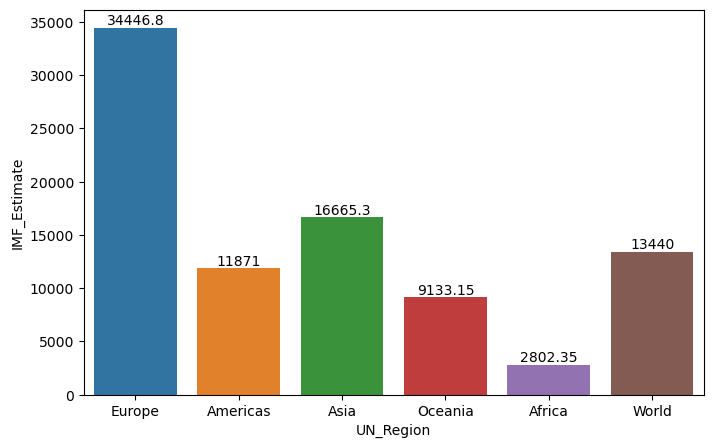

Text(0.5, 1.0, 'My title')

In [140]:
fig = plt.figure(figsize = (8,5))
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate",  
data = df, ci = None)
ax.bar_label(ax.containers[0])
plt.show()
ax.set_title("My title")
#bar plot presents these findings of unregion and imf estimates this ax.bar_label creates labels and 
# ax.containers[0] function shows the [0] where we are getting the index from which is 0

C:\Users\mayow\AppData\Local\Temp\ipykernel_21768\2399983578.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="UN_Region", y="IMF_Estimate", data=df, ci=None)


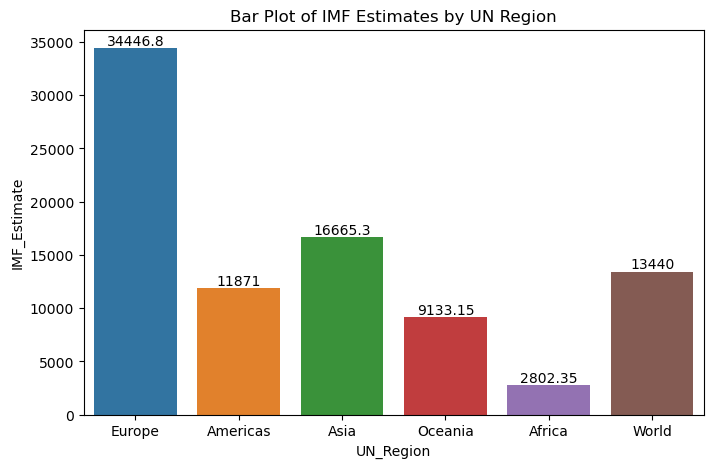

In [181]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x="UN_Region", y="IMF_Estimate", data=df, ci=None)
ax.bar_label(ax.containers[0])
ax.set_title("Bar Plot of IMF Estimates by UN Region")
plt.show()

### Scatter Plot

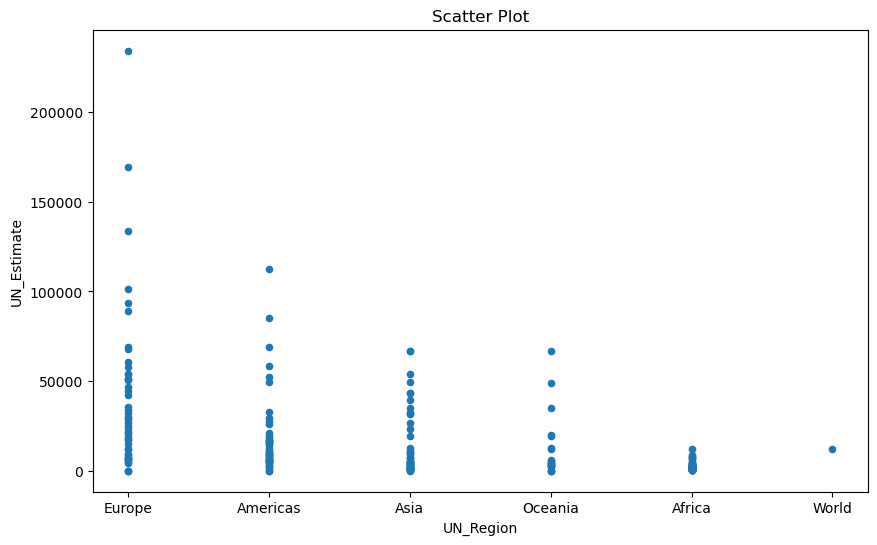

In [159]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

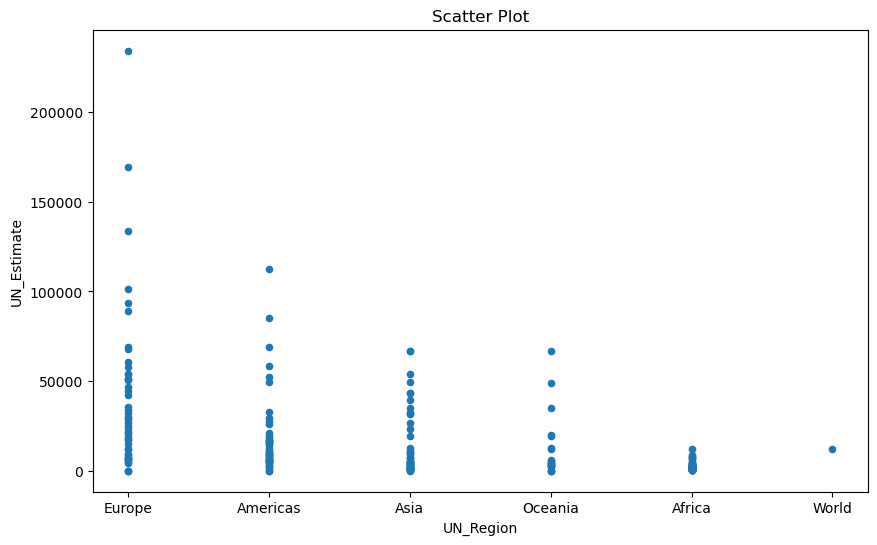

In [158]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
     title="Scatter Plot")

plt.show()

### Boxplot and Outliers

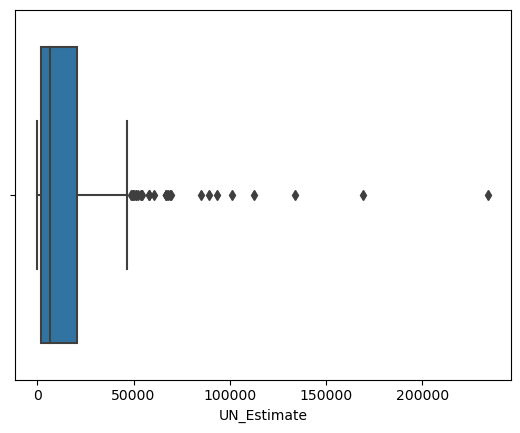

In [146]:
sns.boxplot(x=df["UN_Estimate"])
plt.show()
#displays boxplot

<Axes: xlabel='IMF_Estimate'>

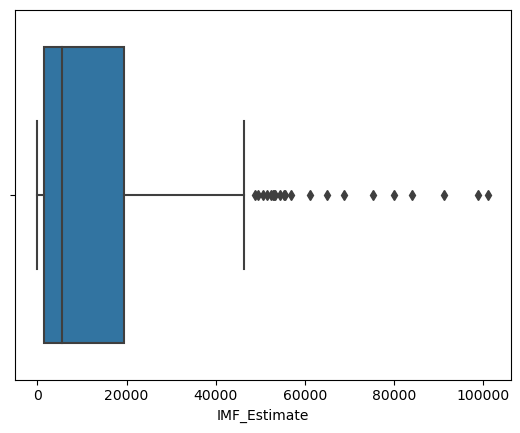

In [157]:
sns.boxplot(x=data["IMF_Estimate"])
# the new data frame called data is the results of the dropped top 5 countries 

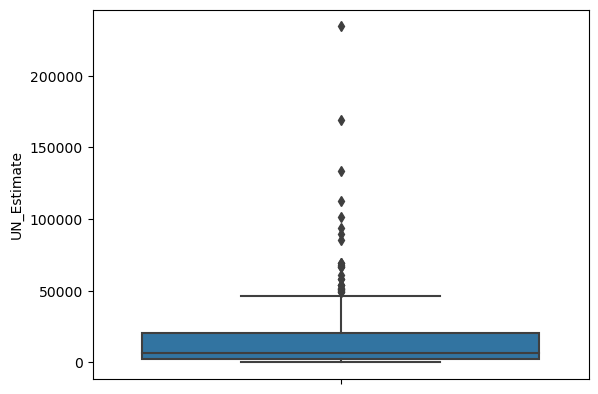

In [147]:
sns.boxplot(y=df["UN_Estimate"])
plt.show()
#horizontal box plot

Removing Outliers:

In [15]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q
#These are quartiles lower 

2039.0

In [39]:
lower_fence = lower_q - (1.5*iqr)

In [38]:
upper_q = df["UN_Estimate"].quantile(0.75)
upper_q
#higher quartile

20740.0

In [40]:
df_filtered = df[(df["UN_Estimate"] < upper_q) & (df["UN_Estimate"] > lower_q)]

In [41]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
63,Greece,Europe,22595,2023,20193,2021,20571,2021
64,Oman,Asia,21960,2023,19510,2021,19509,2021
66,Uruguay,Americas,21677,2023,17313,2021,17313,2021
67,Barbados,Americas,21085,2023,17226,2021,17225,2021
69,Guyana,Americas,20539,2023,9999,2021,9999,2021


In [42]:
df_filtered.shape

(111, 8)

In [47]:
# This is the IQR formula 
iqr = upper_q - lower_q

In [48]:
lower_fence = lower_q - (1.5*iqr)

In [49]:
upper_fence = upper_q + 1.5*iqr

In [50]:
df_no_outliers = df[(df["UN_Estimate"] > lower_fence) & (df["UN_Estimate"] < upper_fence)]